In [15]:
import geopandas as gpd 
import pandas as pd
from shapely import ops
import os
import shapely
import numpy as np
import psycopg2
import pandana as pdna
import networkx as nx
import multiprocessing as mp
import matplotlib.pyplot as plt
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *
from scipy import stats
import seaborn as sns; sns.set()
from shapely.geometry import *
shapely.speedups.enable()

%matplotlib inline

In [16]:

password = open('password.txt','r').readline()
username = 'postgres'
walkability_engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/walkability' %(username,password))
#summary = gpd.read_postgis("select * from results.census_summary_walktimes_fin", walkability_engine, 'geom')
#buildings = gpd.read_postgis("select * from staging.buildings327", walkability_engine, 'geom')
buildings = gpd.read_postgis("select * from staging.buildings527", walkability_engine, 'geom')

In [17]:
print(buildings.columns.values)

['geom' 'id' 'ctuid' 'ctname' 'ctnum' 'geotext' 'd_fc_0' 'n_fc_0' 'd_ff_0'
 'n_ff_0' 'd_sm_0' 'n_sm_0' 'd_hp_0' 'n_hp_0' 'd_sxhc_0' 'n_sxhc_0'
 'd_wc_0' 'n_wc_0' 'd_sc_0' 'n_sc_0' 'd_ar_0' 'n_ar_0' 'd_dc_0' 'n_dc_0'
 'd_di_0' 'n_di_0' 'd_ems_0' 'n_ems_0' 'd_fc_1' 'n_fc_1' 'd_ff_1' 'n_ff_1'
 'd_sm_1' 'n_sm_1' 'd_hp_1' 'n_hp_1' 'd_sxhc_1' 'n_sxhc_1' 'd_wc_1'
 'n_wc_1' 'd_sc_1' 'n_sc_1' 'd_ar_1' 'n_ar_1' 'd_dc_1' 'n_dc_1' 'd_di_1'
 'n_di_1' 'd_ems_1' 'n_ems_1' 'd_frc_0' 'n_frc_0' 'd_fr_0' 'n_fr_0'
 'd_lb_0' 'n_lb_0' 'd_plc_0' 'n_plc_0' 'd_rec_0' 'n_rec_0' 'd_thing_0'
 'n_thing_0' 'd_vtl_0' 'n_vtl_0' 'd_bp_0' 'n_bp_0' 'd_bs_0' 'n_bs_0'
 'd_ttcstop_0' 'n_ttcstop_0' 'd_ttcst_0' 'n_ttcst_0' 'd_ttcacc_0'
 'n_ttcacc_0' 'd_frc_1' 'n_frc_1' 'd_fr_1' 'n_fr_1' 'd_lb_1' 'n_lb_1'
 'd_plc_1' 'n_plc_1' 'd_rec_1' 'n_rec_1' 'd_thing_1' 'n_thing_1' 'd_vtl_1'
 'n_vtl_1' 'd_bp_1' 'n_bp_1' 'd_bs_1' 'n_bs_1' 'd_ttcstop_1' 'n_ttcstop_1'
 'd_ttcst_1' 'n_ttcst_1' 'd_ttcacc_1' 'n_ttcacc_1' 'm_fc_0' 'm_fc_1'
 'm_f

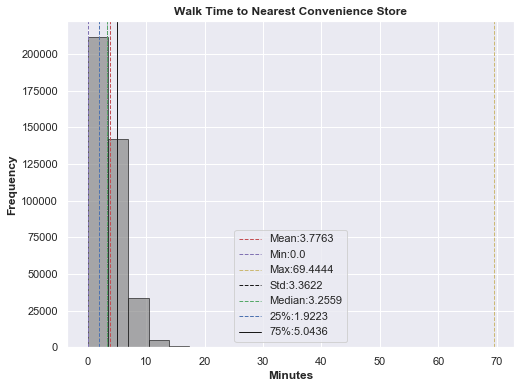

In [18]:
#test to show that you can generate first pair of histogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns; sns.set()
columns = np.array(buildings["m_fc_0"])
columns = np.array(buildings["m_ff_0"])
columns = np.array(buildings["m_sm_0"])
columns = np.array(buildings["m_hp_0"])
columns = np.array(buildings["m_sxhc_0"])
columns = np.array(buildings["m_wc_0"])
columns = np.array(buildings["m_sc_0"])
columns = np.array(buildings["m_ar_0"])
columns = np.array(buildings["m_dc_0"])
columns = np.array(buildings["m_di_0"])
columns = np.array(buildings["m_ems_0"])
columns = np.array(buildings["m_frc_0"])
columns = np.array(buildings["m_fr_0"])
columns = np.array(buildings["m_lb_0"])
columns = np.array(buildings["m_plc_0"])
columns = np.array(buildings["m_rec_0"])
columns = np.array(buildings["m_thing_0"])
columns = np.array(buildings["m_vtl_0"])
columns = np.array(buildings["m_bp_0"])
columns = np.array(buildings["m_ttcst_0"])
columns = np.array(buildings["m_ttcacc_0"])
columns = np.array(buildings["m_ttcstop_0"])
plt.figure(figsize=(8,6))
#print("Mean:       ", columns.mean())
#print("Standard deviation:", columns.std())
#print("Minimum:    ", columns.min())
#print("Maximum:    ", columns.max())
#print("25th percentile:   ", np.percentile(columns, 25))
#print("Median:            ", np.median(columns))
#print("75th percentile:   ", np.percentile(columns, 75))

Mean=round(columns.mean(),4)
Min=round(columns.min(),4)
Max=round(columns.max(),4)
Std=round(columns.std(),4)
Median=round(np.median(columns),4)
t25h=np.percentile(columns, 25)
th25 = round(t25h, 4)
t75h=np.percentile(columns, 75)
th75=round(t75h, 4)
#textstr = '\n'.join((
##    r'Mean=%.2f' % (Mean, ),
#    r'Min=%.2f' % (Min, ),
#    r'Max=%.2f' % (Max, ),
 #   r'Std=%.2f' % (Std, ),
#    r'Median=%.2f' % (Median, ),
#    r't25h=%.2f' % (t25h, ),
#    r't75h=%.2f' % (t75h, )))
#print(Mean, Std, Min, Max, Median, t25h, t75h)
plt.hist(columns, bins=20, color='grey', edgecolor='k', alpha=0.65, )
plt.axvline(columns.mean(), color='r', linestyle='dashed', linewidth=1, label="Mean:" + str(Mean))
plt.axvline(columns.min(), color='m', linestyle='dashed', linewidth=1, label="Min:" + str(Min))
plt.axvline(columns.max(), color='y', linestyle='dashed', linewidth=1, label="Max:" + str(Max))
plt.axvline(columns.std(), color='k', linestyle='dashed', linewidth=1, label="Std:" + str(Std))
plt.axvline(np.median(columns), color='g', linestyle='dashed', linewidth=1, label="Median:" + str(Median))
plt.axvline(np.percentile(columns, 25), color='b', linestyle='dashed', linewidth=1, label="25%:" + str(th25))
plt.axvline(np.percentile(columns, 75), color='k', linestyle='solid', linewidth=1, label="75%:" + str(th75))
#plt.text(55, 50.95, textstr )
plt.title('Walk Time to Nearest Convenience Store', fontweight="bold")
#plt.title(col + " " +'Walking Minutes')
plt.xlabel('Minutes', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold");
plt.legend(loc=0)
plt.savefig('./m_fc_0.jpg')
#fig.savefig(i)
#fig.clf()

In [19]:
#
buildingsd = buildings[['m_fc_0','m_fc_1','m_ff_0','m_ff_1','m_sm_0','m_sm_1','m_hp_0','m_hp_1','m_sxhc_0','m_sxhc_1','m_wc_0','m_wc_1','m_sc_0','m_sc_1','m_ar_0','m_ar_1','m_dc_0','m_dc_1','m_di_0','m_di_1','m_ems_0','m_ems_1','m_frc_0','m_frc_1','m_fr_0','m_fr_1','m_lb_0','m_lb_1','m_plc_0','m_plc_1','m_rec_0','m_rec_1','m_thing_0','m_thing_1','m_vtl_0','m_vtl_1','m_bp_0','m_bp_1','m_bs_0','m_bs_1','m_ttcstop_0','m_ttcstop_1','m_ttcst_0','m_ttcst_1','m_ttcacc_0','m_ttcacc_1']]

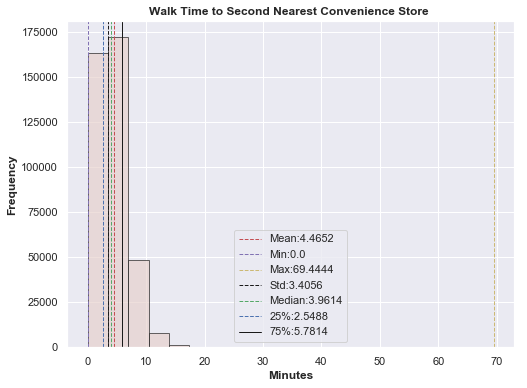

In [20]:
#test to show that you can generate second pair of histogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns; sns.set()
columns = np.array(buildings["m_fc_1"])
columns = np.array(buildings["m_ff_1"])
columns = np.array(buildings["m_sm_1"])
columns = np.array(buildings["m_hp_1"])
columns = np.array(buildings["m_sxhc_1"])
columns = np.array(buildings["m_wc_1"])
columns = np.array(buildings["m_sc_1"])
columns = np.array(buildings["m_ar_1"])
columns = np.array(buildings["m_dc_1"])
columns = np.array(buildings["m_fc_1"])
columns = np.array(buildings["m_di_1"])
columns = np.array(buildings["m_ems_1"])
columns = np.array(buildings["m_frc_1"])
columns = np.array(buildings["m_fr_1"])
columns = np.array(buildings["m_lb_1"])
columns = np.array(buildings["m_plc_1"])
columns = np.array(buildings["m_rec_1"])
columns = np.array(buildings["m_thing_1"])
columns = np.array(buildings["m_vtl_1"])
columns = np.array(buildings["m_bp_1"])
columns = np.array(buildings["m_ttcst_1"])
columns = np.array(buildings["m_ttcacc_1"])
columns = np.array(buildings["m_ttcstop_1"])
plt.figure(figsize=(8,6))
#print("Mean:       ", columns.mean())
#print("Standard deviation:", columns.std())
#print("Minimum:    ", columns.min())
#print("Maximum:    ", columns.max())
#print("25th percentile:   ", np.percentile(columns, 25))
#print("Median:            ", np.median(columns))
#print("75th percentile:   ", np.percentile(columns, 75))

Mean=round(columns.mean(),4)
Min=round(columns.min(),4)
Max=round(columns.max(),4)
Std=round(columns.std(),4)
Median=round(np.median(columns),4)
t25h=np.percentile(columns, 25)
th25 = round(t25h, 4)
t75h=np.percentile(columns, 75)
th75=round(t75h, 4)
#textstr = '\n'.join((
##    r'Mean=%.2f' % (Mean, ),
#    r'Min=%.2f' % (Min, ),
#    r'Max=%.2f' % (Max, ),
 #   r'Std=%.2f' % (Std, ),
#    r'Median=%.2f' % (Median, ),
#    r't25h=%.2f' % (t25h, ),
#    r't75h=%.2f' % (t75h, )))
#print(Mean, Std, Min, Max, Median, t25h, t75h)
plt.hist(columns, bins=20, color='#E6CFCA', edgecolor='k', alpha=0.65, )
plt.axvline(columns.mean(), color='r', linestyle='dashed', linewidth=1, label="Mean:" + str(Mean))
plt.axvline(columns.min(), color='m', linestyle='dashed', linewidth=1, label="Min:" + str(Min))
plt.axvline(columns.max(), color='y', linestyle='dashed', linewidth=1, label="Max:" + str(Max))
plt.axvline(columns.std(), color='k', linestyle='dashed', linewidth=1, label="Std:" + str(Std))
plt.axvline(np.median(columns), color='g', linestyle='dashed', linewidth=1, label="Median:" + str(Median))
plt.axvline(np.percentile(columns, 25), color='b', linestyle='dashed', linewidth=1, label="25%:" + str(th25))
plt.axvline(np.percentile(columns, 75), color='k', linestyle='solid', linewidth=1, label="75%:" + str(th75))
#plt.text(55, 50.95, textstr )
plt.title('Walk Time to Second Nearest Convenience Store ', fontweight="bold")
#plt.title(col + " " +'Walking Minutes')
plt.xlabel('Minutes', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold");
plt.legend(loc=0)
plt.savefig('./m_fc_1.jpg')
#fig.savefig(i)
#fig.clf()

In [21]:
#reading fieldtitle.csv from nero
fields = pd.read_csv('./fieldtitle.csv')

fields['mcol0'] = fields[['minutes_column', 'poi0']].apply(lambda x: ''.join(x), axis=1)

fields['mcol1'] = fields[['minutes_column', 'poi1']].apply(lambda x: ''.join(x), axis=1)

In [22]:
fields.head(2)

,1,Shortname,title,minutes_column,poi0,poi1,mcol0,mcol1
0,2,foodconv,Convenience Stores,m_fc,_0,_1,m_fc_0,m_fc_1
1,3,fastfood,Fast Food Stores,m_ff,_0,_1,m_ff_0,m_ff_1


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


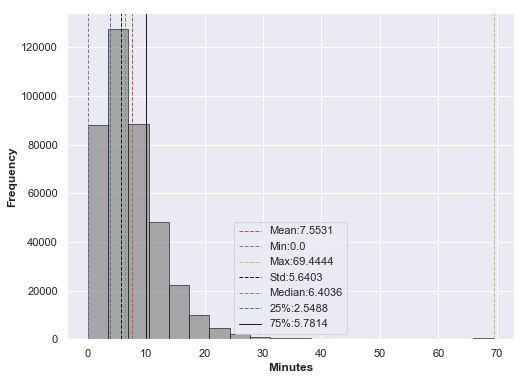

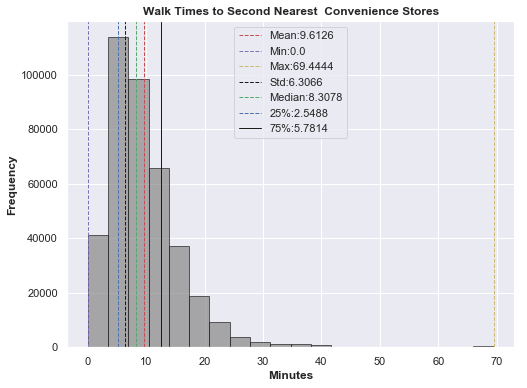

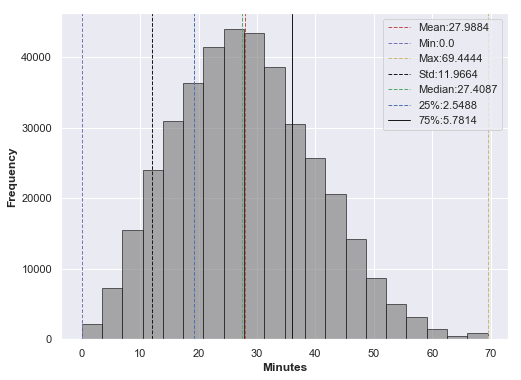

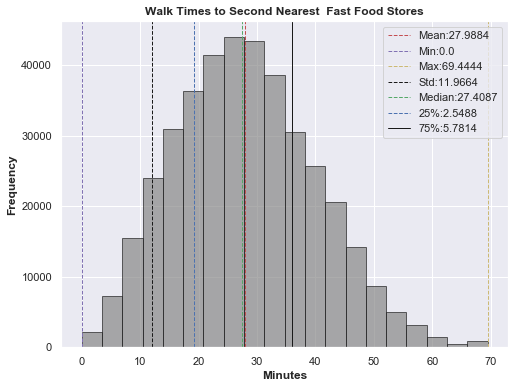

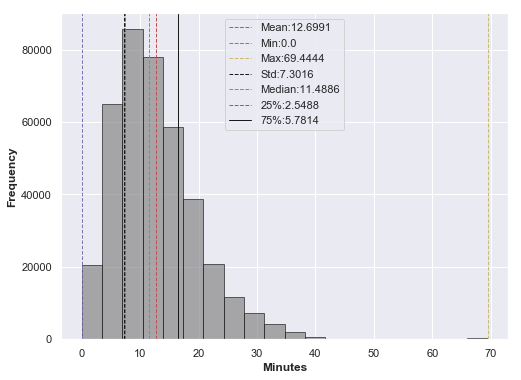

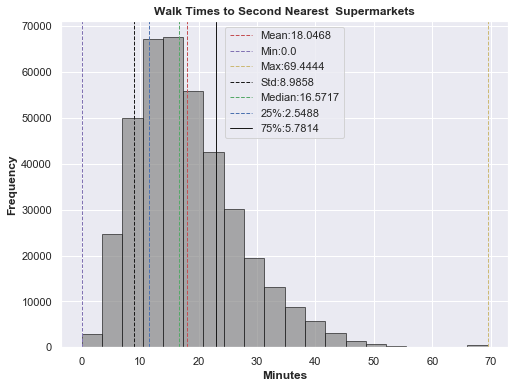

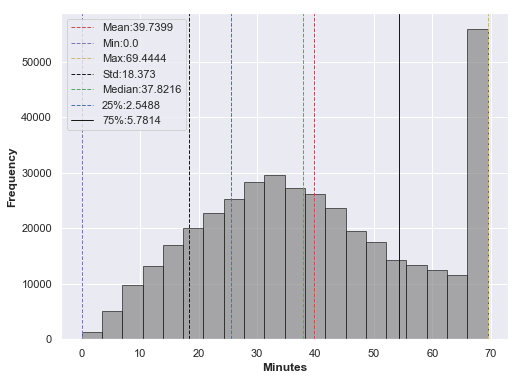

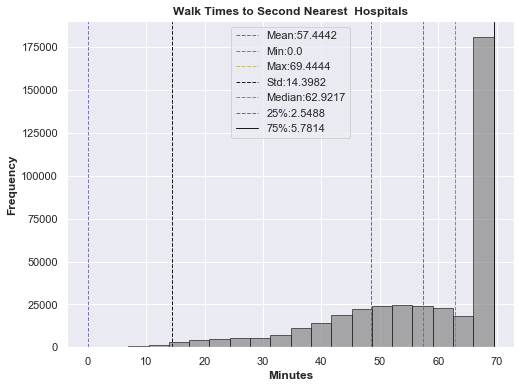

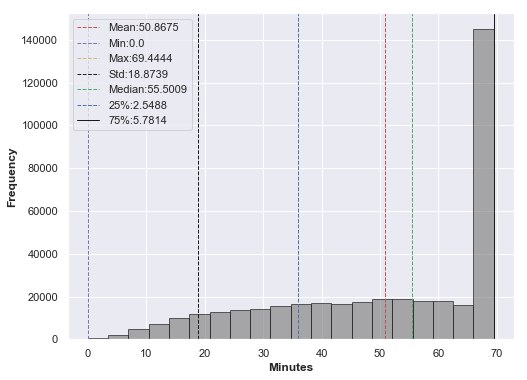

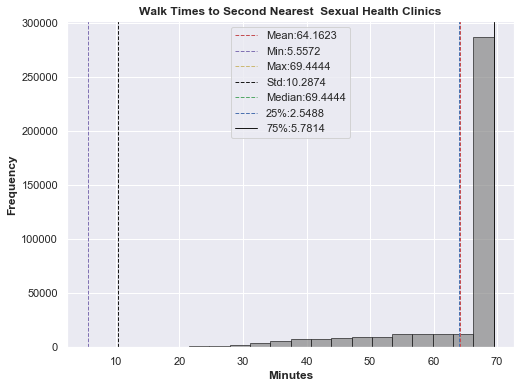

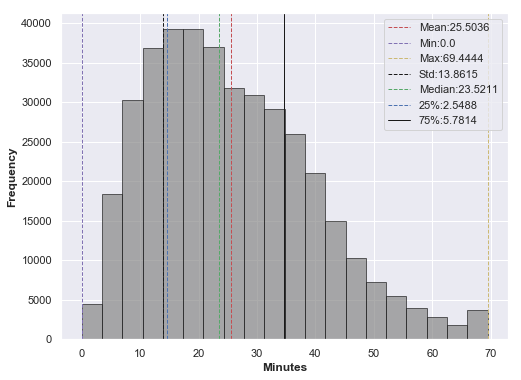

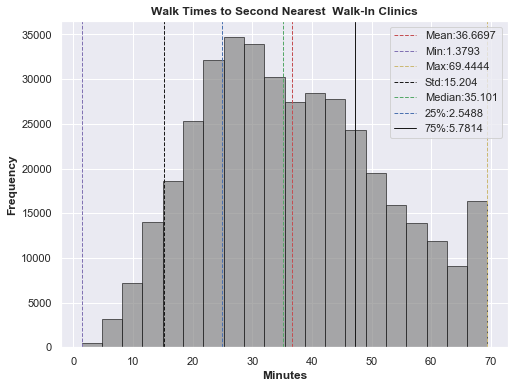

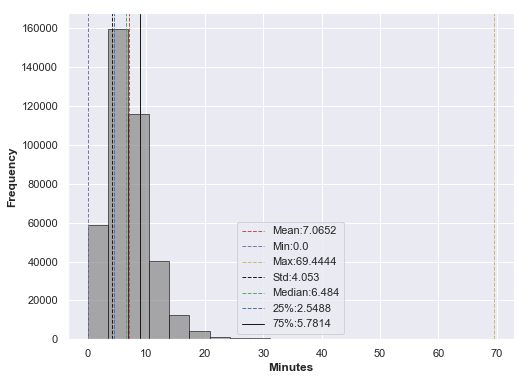

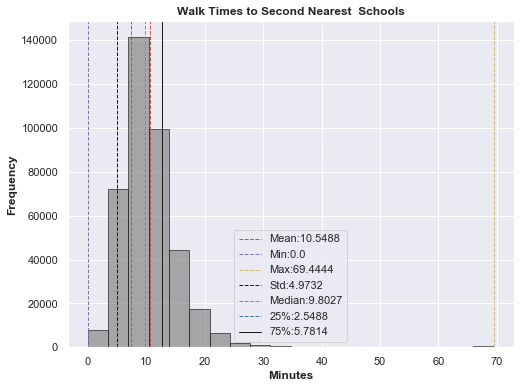

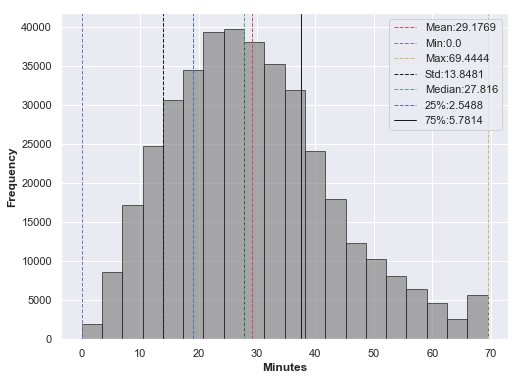

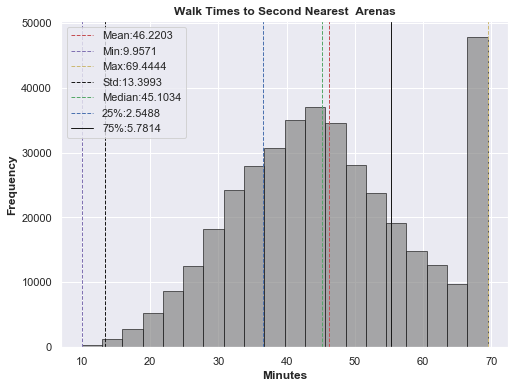

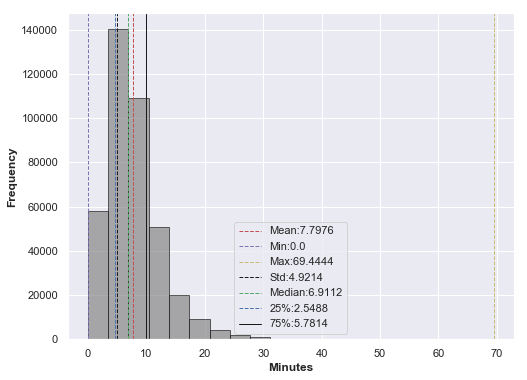

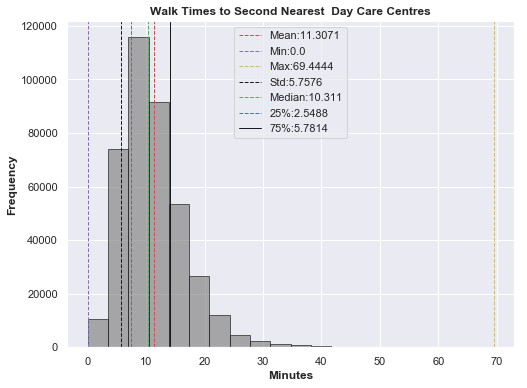

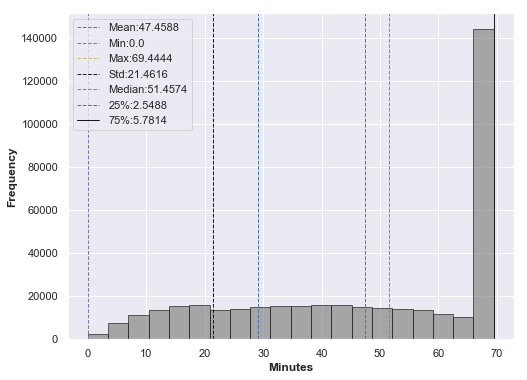

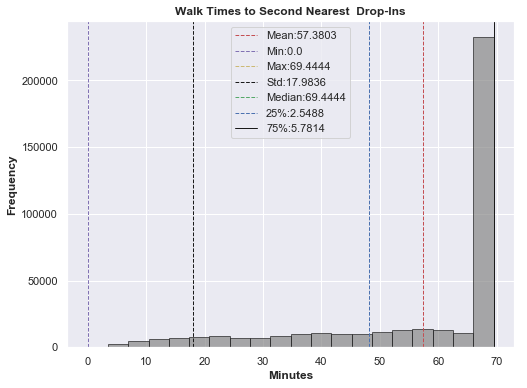

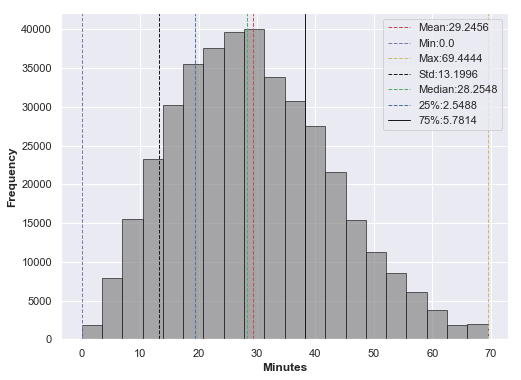

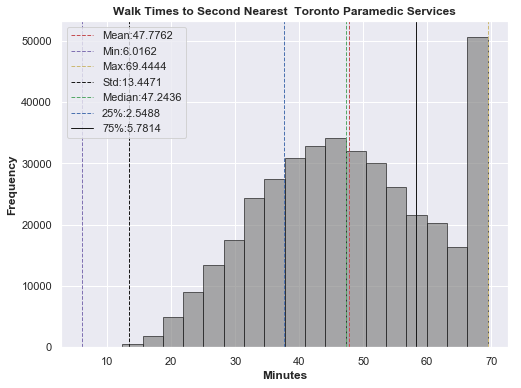

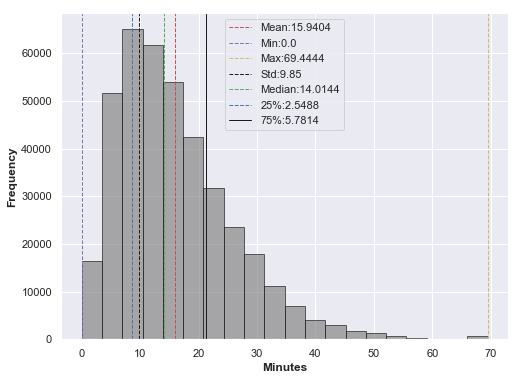

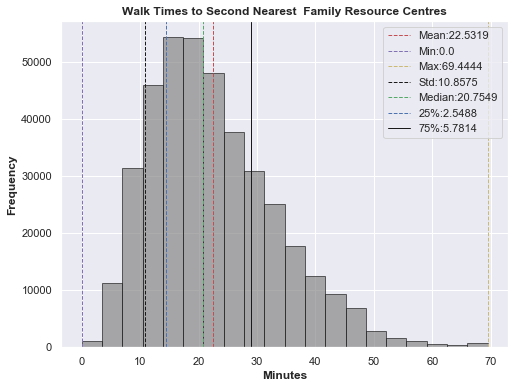

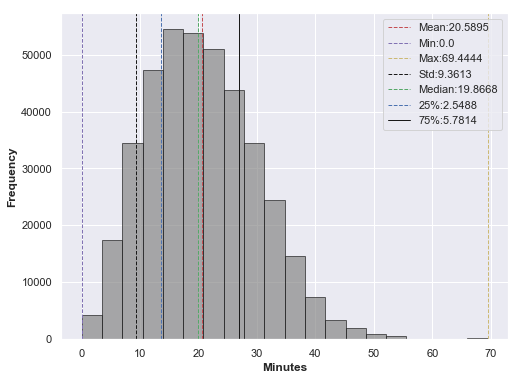

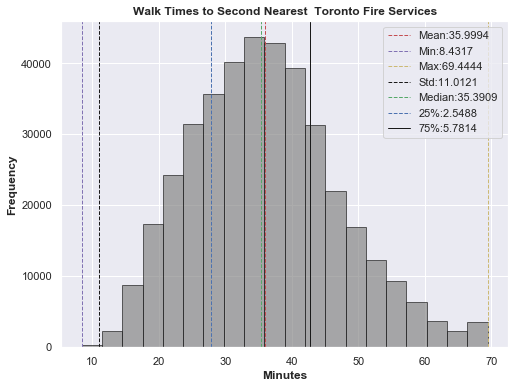

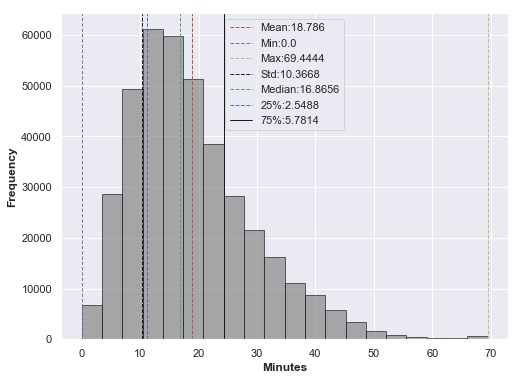

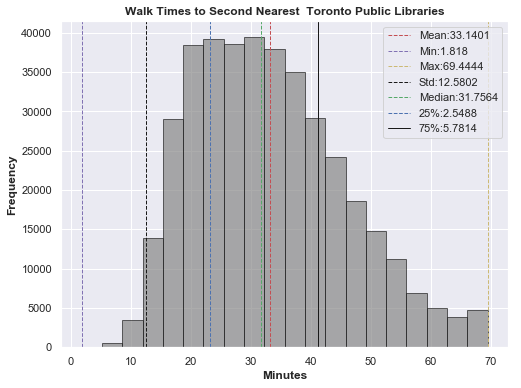

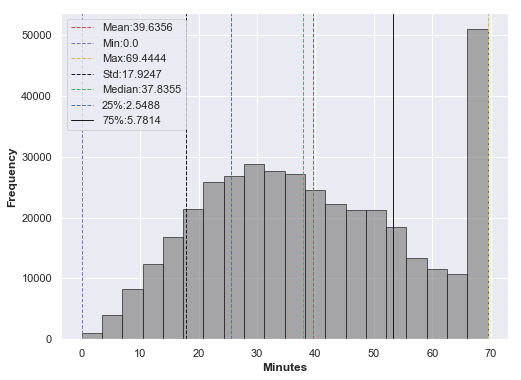

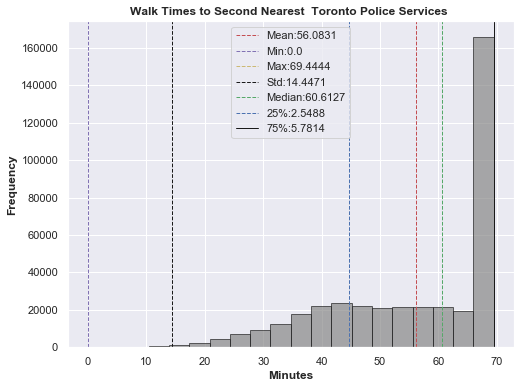

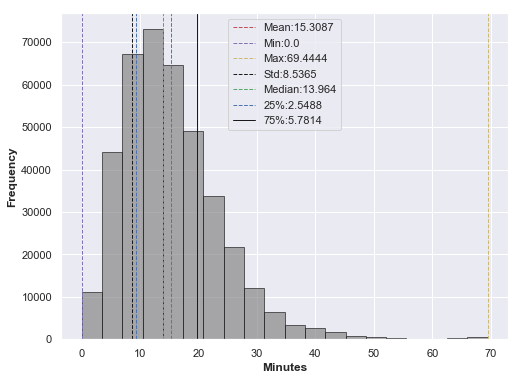

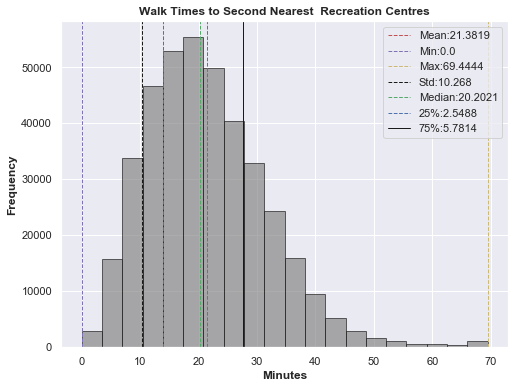

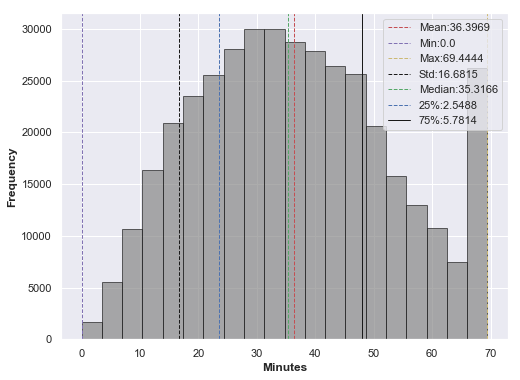

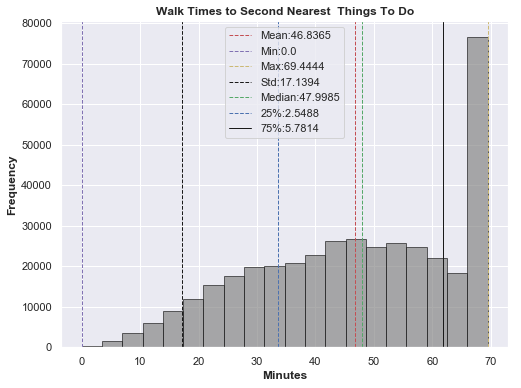

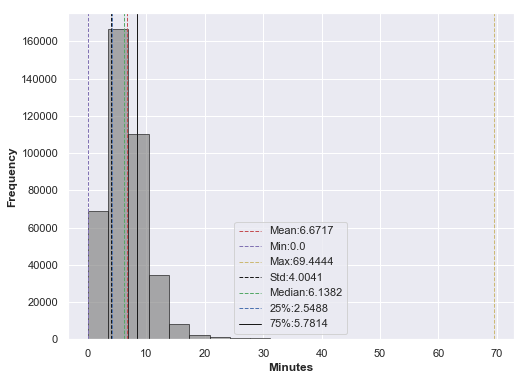

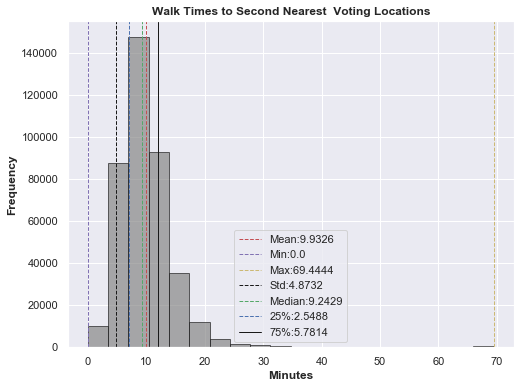

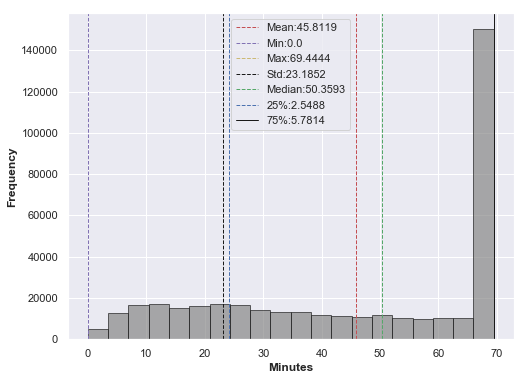

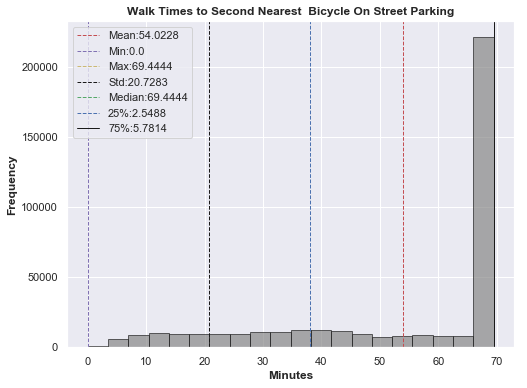

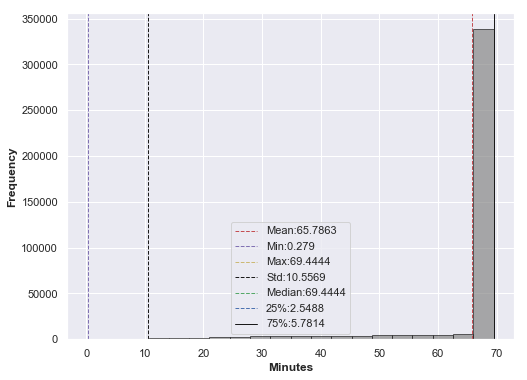

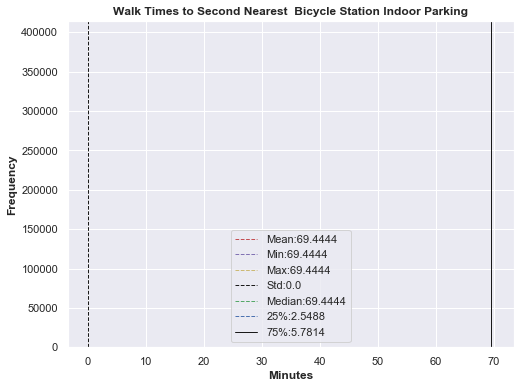

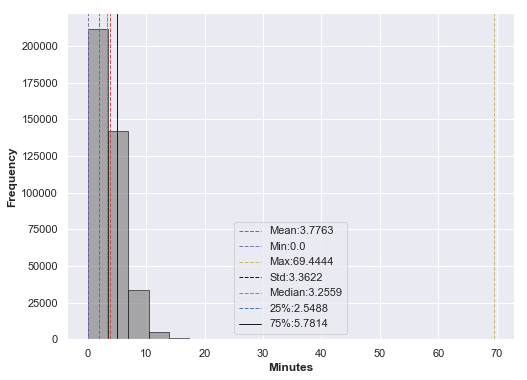

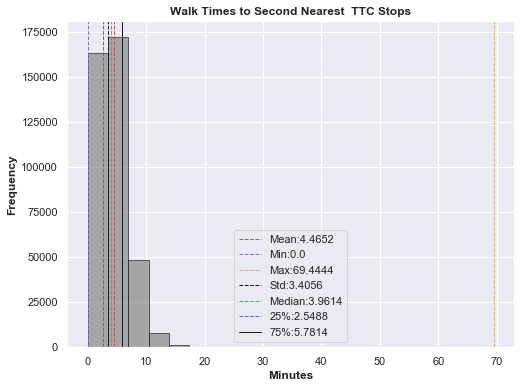

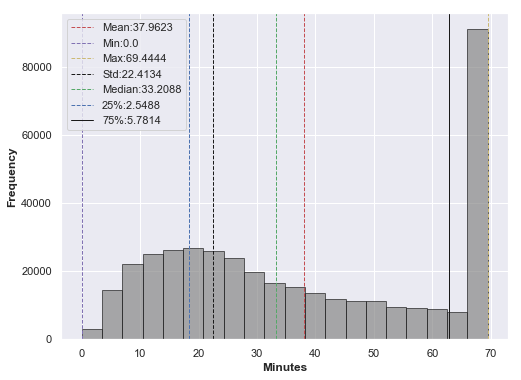

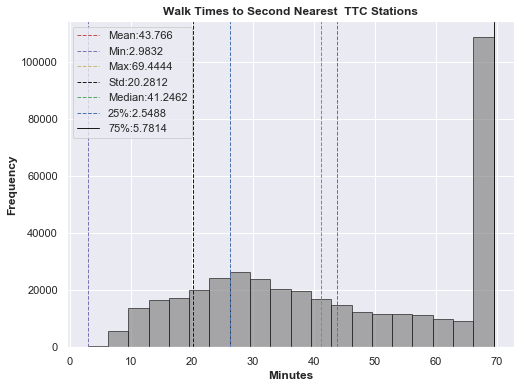

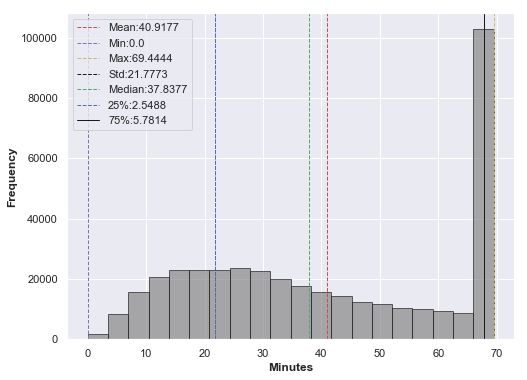

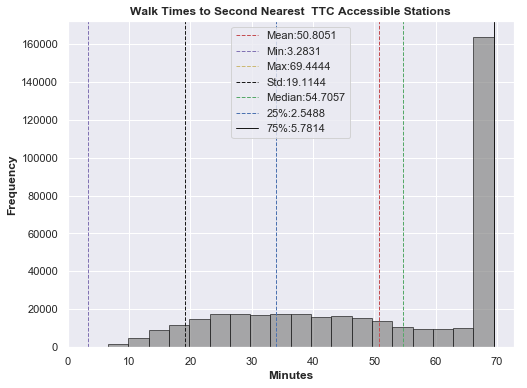

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns; sns.set()
for i, col in enumerate(buildingsd.columns):
    #for ix, row in fields.iterrows():
    #if fields['mcol0'].str.contains('col').any():
        
    columns = np.array(buildingsd[col])
    plt.figure(figsize=(8,6))
    Mean=round(columns.mean(),4)
    Std=round(columns.std(),4)
    Min=round(columns.min(),4)
    Max=round(columns.max(),4)
    Median=round(np.median(columns),4)
    t25h=np.percentile(columns, 25)
    t75h=np.percentile(columns, 75)
    #textstr = '\n'.join((
    #    r'Mean=%.2f' % (Mean, ),
    #    r'Min=%.2f' % (Min, ),
    #    r'Max=%.2f' % (Max, ),
    #    r'Std=%.2f' % (Std, ),
    #    r'Median=%.2f' % (Median, ),
    #    r't25h=%.2f' % (t25h, ),
     #   r't75h=%.2f' % (t75h, )))
    #print(Mean, Std, Min, Max, Median, t25h, t75h)
    
    # run first pass to make first of pair of histogram coloured pink
    plt.hist(columns, bins=20, color='#E6CFCA', edgecolor='k', alpha=0.65, )
    # run second pass to make second of pair of histogram coloured grey
    plt.hist(columns, bins=20, color='grey', edgecolor='k', alpha=0.65, )
    
    plt.axvline(columns.mean(), color='r', linestyle='dashed', linewidth=1, label="Mean:" + str(Mean))
    plt.axvline(columns.min(), color='m', linestyle='dashed', linewidth=1, label="Min:" + str(Min))
    plt.axvline(columns.max(), color='y', linestyle='dashed', linewidth=1, label="Max:" + str(Max))
    plt.axvline(columns.std(), color='k', linestyle='dashed', linewidth=1, label="Std:" + str(Std))
    plt.axvline(np.median(columns), color='g', linestyle='dashed', linewidth=1, label="Median:" + str(Median))
    plt.axvline(np.percentile(columns, 25), color='b', linestyle='dashed', linewidth=1, label="25%:" + str(th25))
    plt.axvline(np.percentile(columns, 75), color='k', linestyle='solid', linewidth=1, label="75%:" + str(th75))
    #plt.text(55, 50.95, textstr )
    #plt.title('Walk Time to' + col, fontweight="bold")
    #plt.title(col + " " +'Walking Minutes')
    plt.xlabel('Minutes', fontweight="bold")
    plt.ylabel('Frequency', fontweight="bold");
    plt.legend(loc=0)
    #mf = fields[fields['mcol0'].str.contains(col)]
    #mf=any(fields['mcol0'] == col)
    #mf = fields[fields['mcol0']== col]
    #col = fields.loc[(fields['mcol0'] == col)
    #run twice once with df = fields.loc[fields.mcol0 == col] and second time with df = fields.loc[fields.mcol1 == col]
    #df = fields.loc[fields.mcol0 == col]
    df = fields.loc[fields.mcol1 == col]
    test=pd.DataFrame(df)
    check=test.reset_index(inplace=True)
    #df = pd.DataFrame(df).transpose()
    #df1 = df.to_csv('./dftitle.csv')
    
    #run once with nearest and run second time with Second Nearest
    #tit = str(('Walk Times to Nearest ' + " " +test['title'].values)).replace("'", "").replace("[", "").replace("]", "")    
    tit = str(('Walk Times to Second Nearest ' + " " +test['title'].values)).replace("'", "").replace("[", "").replace("]", "")
    plt.title(tit, fontweight="bold")
    #plt.savefig('./m_fc_1.jpg')
   
    # run twice
    # run plt.savefig('./col{0}.jpg'.format(i)) first
    # run plt.savefig('./col1{0}.jpg'.format(i)) second
    # comment out plt.savefig('./col{0}.jpg'.format(i))
    # uncomment second plt.savefig('./col1{0}.jpg'.format(i))
    # delete untitled images from each set of histograms
    plt.savefig('./col{0}.jpg'.format(i))
    #plt.savefig('./col1{0}.jpg'.format(i))
   